### Jupyter Notebook Description

This notebook is part of IoT project prepared by :
- Arushi Kumar (220150032)
- Rishita Agarwal (220150016)
- Heet Patel (220150010)
- Prince Tholia (220150012)

#### Objective:
The primary goal of this notebook is to train a machine learning model that predicts the optimal soil moisture for a healthy plant based on various environmental, soil, and plant-related features.

#### Dataset:
The dataset used is the plant-health-data dataset, available on Kaggle. This dataset provides comprehensive information on plant health, including soil properties, environmental conditions, and plant health indicators.

#### Workflow:
1. Dataset Analysis:
    - Dataset is cleaned and preprocessed
    - The dataset is thoroughly analyzed to identify features that impact soil moisture and plant health.
    - Insights are derived to understand the relationships between soil properties, environmental conditions, and plant health indicators via correlations etc

2. Feature Selection :
    - Key features influencing soil moisture are identified and selected for model training.

3. Model Training :
    - A machine learning model is trained to predict the optimal soil moisture for a healthy plant, given other features such as ambient temperature, humidity, soil pH, and nutrient levels.

This notebook provides a detailed workflow, from data exploration to model evaluation, to assist in understanding and improving plant health through data-driven insights.

In [80]:
import numpy as np
import pandas as pd
import os

### Dataset Overview

This dataset, sourced from Kaggle, provides comprehensive information on plant health and the environmental conditions that affect it. It contains several categories of features that are crucial for assessing the well-being of plants.

1. Plant Identification:
   - Plant_ID: A unique numerical identifier assigned to each plant in the dataset.

2. Soil Properties:
   - Soil_Moisture (%): Indicates the amount of water present in the soil.
   - Soil_Temperature (°C): Measures the temperature near the plant's root zone.
   - Soil_pH: Indicates whether the soil is acidic or alkaline.
   - Nitrogen_Level (mg/kg), Phosphorus_Level (mg/kg), and Potassium_Level (mg/kg): Provide nutrient concentrations that are vital for plant development.

3. Environmental Conditions:
   - Ambient_Temperature (°C): The surrounding air temperature near the plant.
   - Humidity (%): Represents the moisture content in the atmosphere.
   - Light_Intensity (Lux): Measures the level of light available, which is essential for photosynthesis.

4. Plant Health Indicators:
   - Chlorophyll_Content (mg/m²): A metric reflecting the photosynthetic potential of the plant.
   - Electrochemical_Signal (mV): Captures bioelectrical responses that may signal environmental or physiological stress.

5. Target Variable:
   - Plant_Health_Status: A categorical variable indicating the plant's condition. It is divided into three classes:
     - Healthy: Represents optimal growing conditions.
     - Moderate Stress: Indicates mild to moderate deviations from ideal conditions.
     - High Stress: Shows significant stress, potentially requiring immediate corrective action.


In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

import warnings
warnings.filterwarnings("ignore")

### Dataset Cleaning and Preprocessing

In [82]:
# Load the dataset
df = pd.read_csv('./plant_health_data.csv')

In [83]:
df

,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,Moderate Stress
1196,2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,High Stress
1197,2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,Moderate Stress
1198,2024-11-01 22:54:53.493508,10,30.971675,23.019488,21.934918,41.387107,492.952014,5.855767,49.402550,23.843971,19.750042,46.027529,0.344597,Healthy


In [84]:
# Display basic information about the dataset
print("Shape of the dataset:", df.shape)
display(df.head())
print("\nDataset Information:")
print(df.info())
print("\nStatistical Summary:")
display(df.describe().T)

Shape of the dataset: (1200, 14)


,Timestamp,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status
0,2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,High Stress
1,2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,High Stress
2,2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,High Stress
3,2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,High Stress
4,2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,High Stress



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Timestamp               1200 non-null   object 
 1   Plant_ID                1200 non-null   int64  
 2   Soil_Moisture           1200 non-null   float64
 3   Ambient_Temperature     1200 non-null   float64
 4   Soil_Temperature        1200 non-null   float64
 5   Humidity                1200 non-null   float64
 6   Light_Intensity         1200 non-null   float64
 7   Soil_pH                 1200 non-null   float64
 8   Nitrogen_Level          1200 non-null   float64
 9   Phosphorus_Level        1200 non-null   float64
 10  Potassium_Level         1200 non-null   float64
 11  Chlorophyll_Content     1200 non-null   float64
 12  Electrochemical_Signal  1200 non-null   float64
 13  Plant_Health_Status     1200 non-null   object 
dtypes: float64(11), in

,count,mean,std,min,25%,50%,75%,max
Plant_ID,1200.0,5.500000,2.873479,1.000000,3.000000,5.500000,8.000000,10.000000
Soil_Moisture,1200.0,25.106918,8.677725,10.000724,17.131893,25.168333,32.370231,39.993164
Ambient_Temperature,1200.0,23.999130,3.441561,18.001993,21.101766,23.889044,27.042634,29.990886
Soil_Temperature,1200.0,19.957794,2.932073,15.003710,17.353027,19.911473,22.596851,24.995929
Humidity,1200.0,54.853165,8.784916,40.028758,47.019694,54.692069,62.451053,69.968871
Light_Intensity,1200.0,612.637265,228.318853,200.615482,416.878983,617.240221,811.474690,999.856262
Soil_pH,1200.0,6.524102,0.581755,5.507392,6.026042,6.540524,7.030039,7.497823
Nitrogen_Level,1200.0,30.106751,11.514396,10.003650,20.249774,30.138590,40.184737,49.951136
Phosphorus_Level,1200.0,30.264484,11.466846,10.017690,20.894445,30.019385,40.131459,49.980700
Potassium_Level,1200.0,30.112088,11.668085,10.000606,19.585561,30.495054,40.108296,49.981945


In [85]:
# Check for missing and duplicated values
print(f'\nMissing values: {df.isna().sum().sum()}')
print(f'Duplicated values: {df.duplicated().sum()}')


Missing values: 0
Duplicated values: 0


In [86]:
# Display the number of unique values in each column
print("\nUnique Values in Each Column:")
print(df.nunique())


Unique Values in Each Column:
Timestamp                 1200
Plant_ID                    10
Soil_Moisture             1200
Ambient_Temperature       1200
Soil_Temperature          1200
Humidity                  1200
Light_Intensity           1200
Soil_pH                   1200
Nitrogen_Level            1200
Phosphorus_Level          1200
Potassium_Level           1200
Chlorophyll_Content       1200
Electrochemical_Signal    1200
Plant_Health_Status          3
dtype: int64


In [87]:
# Separate numerical and categorical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
non_numerical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Display the lists of numerical and categorical columns
print("\nNumerical Columns:", numerical_columns)
print("Categorical Columns:", non_numerical_columns)


Numerical Columns: ['Plant_ID', 'Soil_Moisture', 'Ambient_Temperature', 'Soil_Temperature', 'Humidity', 'Light_Intensity', 'Soil_pH', 'Nitrogen_Level', 'Phosphorus_Level', 'Potassium_Level', 'Chlorophyll_Content', 'Electrochemical_Signal']
Categorical Columns: ['Timestamp', 'Plant_Health_Status']


In [88]:
# Display unique values for each categorical column
for col in non_numerical_columns:
    print(f"\nColumn: {col}")
    print(f"Unique Values: {df[col].unique()}")


Column: Timestamp
Unique Values: ['2024-10-03 10:54:53.407995' '2024-10-03 16:54:53.407995'
 '2024-10-03 22:54:53.407995' ... '2024-11-01 16:54:53.493508'
 '2024-11-01 22:54:53.493508' '2024-11-02 04:54:53.493508']

Column: Plant_Health_Status
Unique Values: ['High Stress' 'Moderate Stress' 'Healthy']


### Exploratory Data Analysis (EDA)

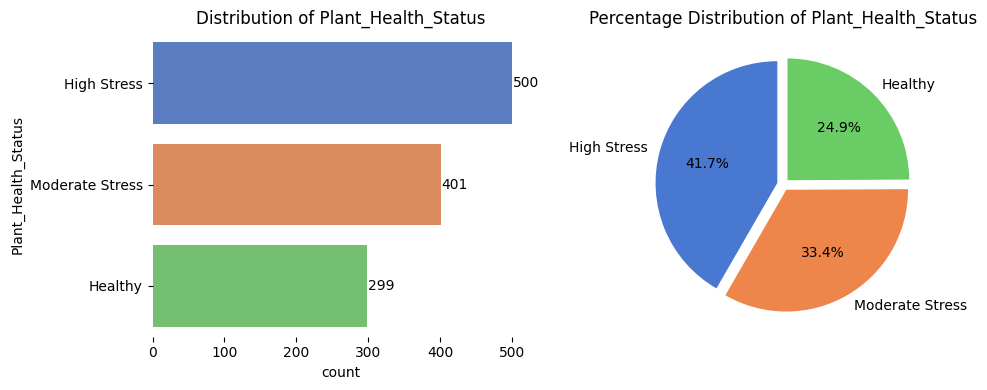

In [89]:
column_name = 'Plant_Health_Status'
plt.figure(figsize=(10, 4))

# First subplot: Count plot
plt.subplot(1, 2, 1)
sns.countplot(y=column_name, data=df, palette='muted')  
plt.title(f'Distribution of {column_name}')

ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{int(p.get_width())}', (p.get_width(), p.get_y() + p.get_height() / 2), 
                ha='center', va='center', xytext=(10, 0), textcoords='offset points')

sns.despine(left=True, bottom=True)

# Second subplot: Pie chart
plt.subplot(1, 2, 2)
df[column_name].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('muted'), startangle=90, explode=[0.05]*df[column_name].nunique())
plt.title(f'Percentage Distribution of {column_name}')
plt.ylabel('')  

plt.tight_layout()
plt.show()

In [90]:
# Convert Timestamp to datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Check time differences between consecutive entries
time_diffs = df['Timestamp'].diff().value_counts()

print("Most common time differences:")
print(time_diffs.head(10))

Most common time differences:
Timestamp
0 days 06:00:00              1190
-30 days +06:00:00.005996       2
-30 days +06:00:00.008994       2
-30 days +06:00:00.006996       2
-30 days +06:00:00.018556       1
-30 days +06:00:00.012991       1
-30 days +06:00:00.009994       1
Name: count, dtype: int64


In [91]:
columns_to_analyze = [
    'Plant_ID', 'Soil_Moisture', 'Ambient_Temperature', 'Soil_Temperature', 
    'Humidity', 'Light_Intensity', 'Soil_pH', 'Nitrogen_Level', 
    'Phosphorus_Level', 'Potassium_Level', 'Chlorophyll_Content', 
    'Electrochemical_Signal'
]

In [92]:
# Convert the Timestamp column to datetime format if not already
df['Timestamp'] = pd.to_datetime(df['Timestamp'])

# Create a 'Week' column to group by week
df['Week'] = df['Timestamp'].dt.to_period('W').apply(lambda r: r.start_time)

# Aggregate Plant Health Status weekly for each Plant ID
weekly_health_status = (
    df.groupby(['Plant_ID', 'Week', 'Plant_Health_Status'])
    .size()
    .unstack(fill_value=0)
    .reset_index()
)

weekly_health_status.columns.name = None
weekly_health_status = weekly_health_status.rename(columns={
    'High Stress': 'High_Stress_Count',
    'Moderate Stress': 'Moderate_Stress_Count',
    'Healthy': 'Healthy_Count'
})

weekly_health_status

,Plant_ID,Week,Healthy_Count,High_Stress_Count,Moderate_Stress_Count
0,1,2024-09-30,1,9,5
1,1,2024-10-07,10,12,6
2,1,2024-10-14,2,15,11
3,1,2024-10-21,4,8,16
4,1,2024-10-28,7,6,8
5,2,2024-09-30,2,7,6
6,2,2024-10-07,12,10,6
7,2,2024-10-14,7,12,9
8,2,2024-10-21,9,13,6
9,2,2024-10-28,6,11,4


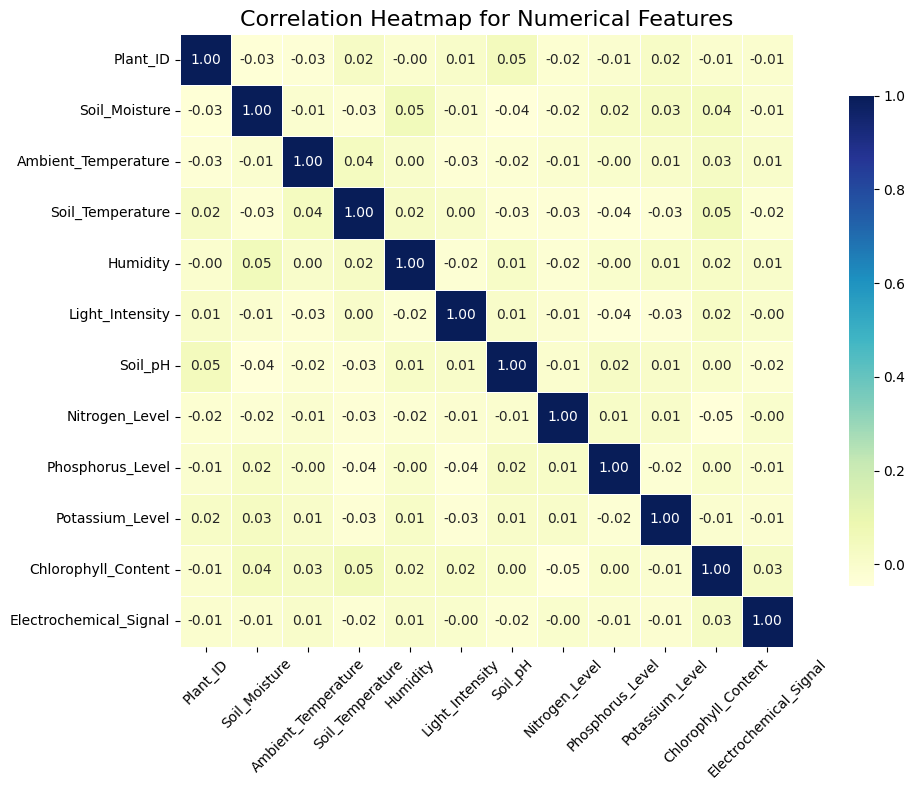

In [93]:
numerical_features = df.select_dtypes(include=[np.number]).columns
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(
    correlation_matrix, 
    annot=True, 
    fmt='.2f', 
    cmap='YlGnBu', 
    square=True, 
    linewidths=0.5, 
    cbar_kws={"shrink": 0.8}
)
plt.title('Correlation Heatmap for Numerical Features', fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

### Detailed Insights from Correlation Table

1. Strongest Positive Correlations:
- Chlorophyll_Content and Soil_Temperature (~0.05):  
  A weak positive link hints that warmer soils may slightly support chlorophyll production.
  
- Soil_Moisture and Humidity (~0.054):  
  Slightly higher air humidity is observed alongside increased soil moisture, possibly due to local microclimate effects.

2. Strongest Negative Correlations:
- Nitrogen_Level and Chlorophyll_Content (~-0.045):  
  An unexpected negative trend suggests nitrogen alone may not enhance chlorophyll content.

- Phosphorus_Level and Soil_Temperature (~-0.040):  
  Areas with cooler soil seem to show higher phosphorus levels, possibly due to specific uptake patterns.

3. Soil Property Interactions:
- Soil_pH and Soil_Temperature (~-0.025):  
  A minor drop in pH with rising temperature may reflect subtle changes in soil chemistry.

- Soil_Moisture and Soil_pH (~-0.044):  
  Slightly more moisture is associated with a lower pH, suggesting a weak acidification effect.

4. Health Indicators and Environment:
- Electrochemical_Signal and Chlorophyll_Content (~0.025):  
  Weak association implies stress signals don't always align with chlorophyll changes.

- Ambient_Temperature and Light_Intensity (~-0.025):  
  Slight inverse trend possibly reflects differences in time-of-day or shaded conditions.

### Key Observations:
- Most relationships are weak, indicating the features operate largely independently.
- Nutrients like nitrogen don’t strongly correlate with plant health, suggesting other environmental factors have a greater impact.


In [94]:
# Convert Timestamp to datetime format and set it as the index

df.set_index('Timestamp', inplace=True)

# Define features to analyze
time_series_features = [
    'Soil_Moisture', 'Soil_Temperature', 'Ambient_Temperature', 
    'Humidity', 'Soil_pH', 'Light_Intensity', 'Nitrogen_Level', 
    'Phosphorus_Level', 'Potassium_Level'
]

# Resample data for daily and weekly averages
daily_averages = df[time_series_features].resample('D').mean()
weekly_averages = df[time_series_features].resample('W').mean()

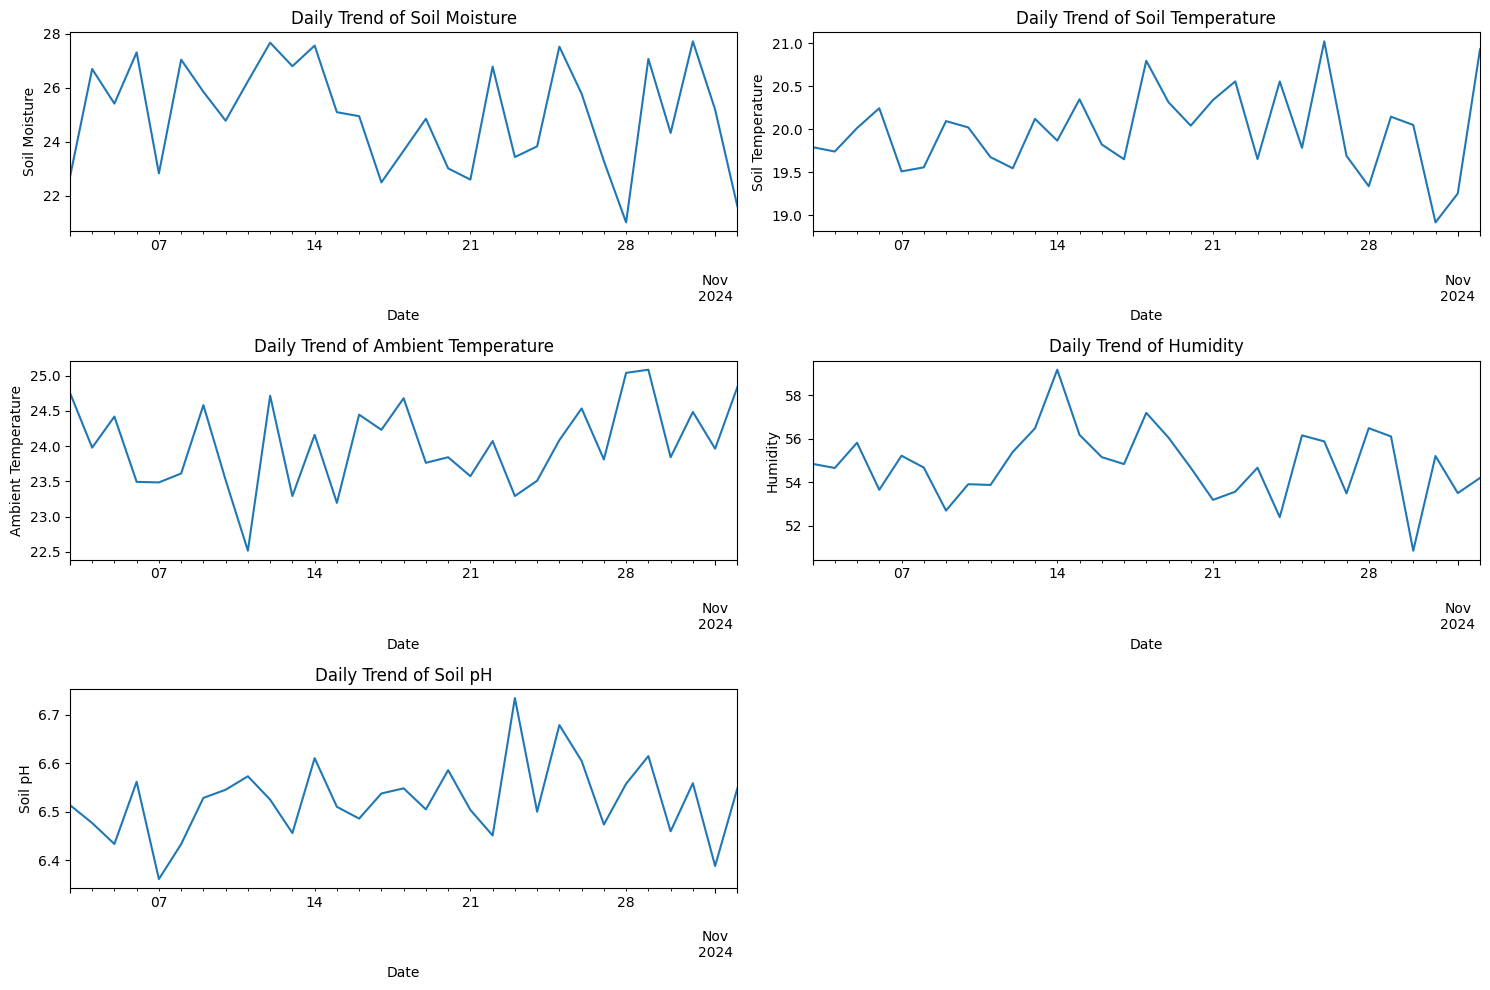

In [95]:
# Plot daily trends for selected features
plt.figure(figsize=(15, 10))
for i, feature in enumerate(time_series_features[:5]):  
    plt.subplot(3, 2, i + 1)
    daily_averages[feature].plot(
        title=f'Daily Trend of {feature.replace("_", " ")}', 
        ylabel=feature.replace('_', ' '), 
        xlabel='Date'
    )
plt.tight_layout()
plt.show()

### Insights from the Daily Trends of Selected Features:

1. Soil Moisture:
- The soil moisture levels show daily fluctuations, with values generally ranging between 22% and 28%.
- There are clear peaks and troughs, indicating periodic watering or environmental changes that influence moisture retention.
- A slight downward trend is observed mid-month, possibly due to reduced watering or higher evaporation rates.

2. Soil Temperature:
- The soil temperature remains relatively stable, with minor variations around 19°C to 21°C.
- The consistency reflects minimal external disruptions, possibly due to controlled environmental conditions or stable weather patterns.

3. Ambient Temperature:
- Ambient temperature fluctuates daily, with values ranging between 22.5°C and 25°C.
- The trend shows periodic peaks and drops, likely corresponding to natural day-night or seasonal temperature cycles.

4. Humidity:
- Humidity exhibits noticeable variability, ranging between 52% and 58%.
- There is a peak in humidity mid-month, which might be due to weather conditions or increased watering practices.
- A sharp drop near the end of the month indicates a potential dry spell or environmental shift.

5. Soil pH:
- The soil pH fluctuates within a narrow range of 6.4 to 6.7, reflecting overall stability in soil acidity.
- There are minor daily variations, possibly influenced by watering, fertilization, or leaching processes.

6. Nitrogen Level:
- Nitrogen levels show a declining trend from the first week (approximately 30.75 mg/kg) to the third week (approximately 29.25 mg/kg), followed by a sharp recovery in the final week.
- This indicates possible depletion of nitrogen in the soil mid-month, potentially due to plant uptake, with replenishment or reduced usage in the last week.


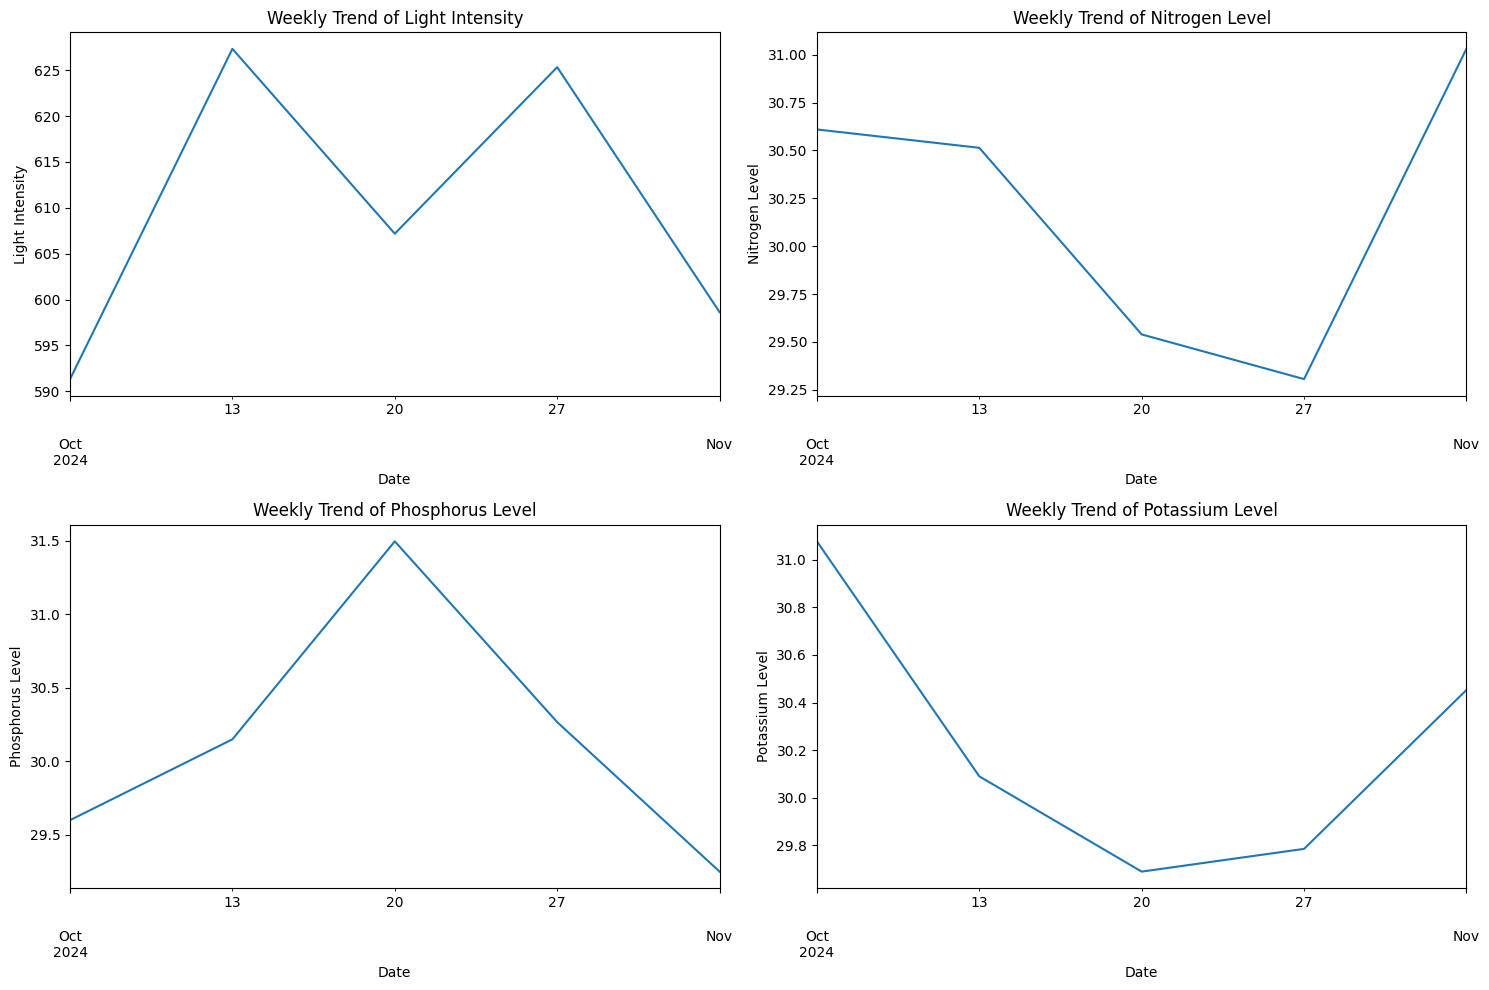

In [96]:
# Plot weekly trends for the remaining 4 features
plt.figure(figsize=(15, 10))
remaining_features = time_series_features[5:]  

for i, feature in enumerate(remaining_features):
    plt.subplot(2, 2, i + 1)
    weekly_averages[feature].plot(
        title=f'Weekly Trend of {feature.replace("_", " ")}', 
        ylabel=feature.replace('_', ' '), 
        xlabel='Date'
    )
plt.tight_layout()
plt.show()

In [97]:
# Custom mapping for Plant_Health_Status
custom_mapping = {'High Stress': 2, 'Moderate Stress': 1, 'Healthy': 0}
df['Plant_Health_Status_Encoded'] = df['Plant_Health_Status'].map(custom_mapping)

# Count unique values in Plant_Health_Status before encoding
unique_value_counts_before = df['Plant_Health_Status'].value_counts()

# Count unique values in Plant_Health_Status_Encoded after encoding
unique_value_counts_after = df['Plant_Health_Status_Encoded'].value_counts()

# Display unique values before and after encoding
print("----- Unique Values in Plant Health Status Before Encoding ----- ")
print(unique_value_counts_before)

print("\n----- Unique Values in Plant Health Status After Encoding ----- ")
print(unique_value_counts_after)

----- Unique Values in Plant Health Status Before Encoding ----- 
Plant_Health_Status
High Stress        500
Moderate Stress    401
Healthy            299
Name: count, dtype: int64

----- Unique Values in Plant Health Status After Encoding ----- 
Plant_Health_Status_Encoded
2    500
1    401
0    299
Name: count, dtype: int64


In [98]:
numerical_features = df.select_dtypes(include=[np.number]).columns

# Z-score Method
z_scores = zscore(df[numerical_features])
outliers_zscore = (np.abs(z_scores) > 3).sum(axis=0)
print("Outliers Detected with Z-scores:\n", outliers_zscore)

Outliers Detected with Z-scores:
 [0 0 0 0 0 0 0 0 0 0 0 0 0]



No outliers were detected across any of the numerical features in the dataset. 

This indicates that the numerical data is well within the expected range, with no extreme values exceeding the Z-score threshold of ±3.

In [99]:
# Drop the original Plant_Health_Status column
df= df.drop(columns=['Plant_Health_Status', 'Week'])

### Calculating Correlation with Target Variable- Soil Moisture 

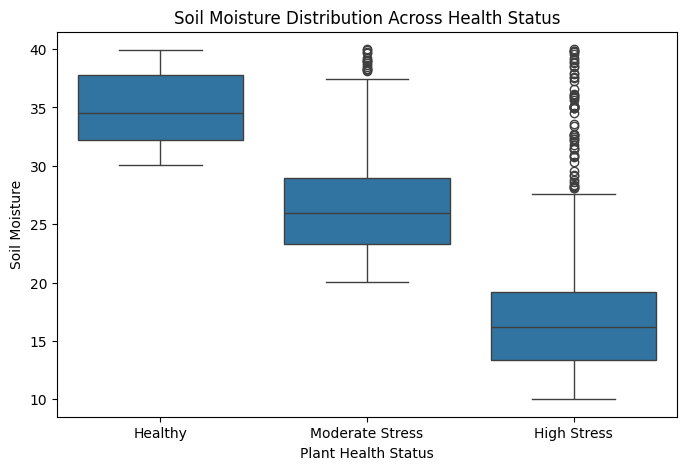

In [100]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df["Plant_Health_Status_Encoded"], y=df["Soil_Moisture"])
plt.xticks([0, 1, 2], ["Healthy", "Moderate Stress", "High Stress"])
plt.xlabel("Plant Health Status")
plt.ylabel("Soil Moisture")
plt.title("Soil Moisture Distribution Across Health Status")
plt.show()


In [101]:
# Calculate correlations
correlations = df.corr()['Soil_Moisture'].sort_values(ascending=False)

# Convert to DataFrame
correlation_table = correlations.to_frame(name='Correlation with Soil MOisture').reset_index()
correlation_table.rename(columns={'index': 'Feature'}, inplace=True)

# Display the table
display(correlation_table)

,Feature,Correlation with Soil MOisture
0,Soil_Moisture,1.000000
1,Humidity,0.053876
2,Chlorophyll_Content,0.039419
3,Potassium_Level,0.030804
4,Phosphorus_Level,0.019002
5,Light_Intensity,-0.009343
6,Ambient_Temperature,-0.009344
7,Electrochemical_Signal,-0.010556
8,Nitrogen_Level,-0.024752
9,Soil_Temperature,-0.026783


### Feature Selection and Justification Using Correlation Analysis

#### Why soil moisture is chosen as the target variable

Soil moisture is a vital factor in determining plant health. It directly influences the plant’s ability to absorb nutrients and water, affecting overall growth and productivity. This is not just supported by biological reasoning, but also by the correlation matrix:

- Soil moisture shows a strong  correlation with plant_health_status_encoded (~ -0.77) and as visible in the box plot 
  - This makes soil moisture a suitable target variable for prediction, as maintaining it within an optimal range can help ensure plant well-being.

By continuously monitoring soil moisture, an IoT-based system can trigger watering actions when levels fall below the optimal threshold, promoting timely and data-driven irrigation.

---

#### Why ambient temperature, humidity, soil pH, nitrogen level, and plant ID are used as input features

These features showed small but meaningful correlations with soil moisture and are measurable with standard sensors:

- Ambient temperature (~ -0.009): Although weakly correlated, it affects the rate of water evaporation from soil. Higher temperatures generally lead to drier soils.

- Humidity (~ 0.054): Shows a slightly positive correlation with soil moisture. Higher humidity reduces water loss, indirectly supporting better soil moisture levels.

- Soil pH (~ -0.043): Slightly negatively correlated. Changes in pH can affect water retention capacity of soil, and also influence nutrient availability.

- Nitrogen level (~ -0.025): Weakly correlated, but still relevant as nutrient uptake often depends on water availability. Low soil moisture can lead to inefficient nitrogen absorption.

- Plant ID (~ -0.034): Different plant species have varied water requirements. Including plant ID allows the model to adjust predictions based on plant-specific water needs.

---

#### Why other features were excluded

Features such as light intensity, chlorophyll content, and electrochemical signals had near-zero correlations with soil moisture. Moreover, these parameters are not currently captured by the deployed sensor network, making them less practical for this use case. 

---

#### Conclusion

The selected input features are not only practically measurable but also carry meaningful relationships with the target variable, soil moisture. This balance ensures that the prediction model remains both data-driven and deployable for real-world agricultural monitoring.


In [102]:
df

,Plant_ID,Soil_Moisture,Ambient_Temperature,Soil_Temperature,Humidity,Light_Intensity,Soil_pH,Nitrogen_Level,Phosphorus_Level,Potassium_Level,Chlorophyll_Content,Electrochemical_Signal,Plant_Health_Status_Encoded
Timestamp,,,,,,,,,,,,,
2024-10-03 10:54:53.407995,1,27.521109,22.240245,21.900435,55.291904,556.172805,5.581955,10.003650,45.806852,39.076199,35.703006,0.941402,2
2024-10-03 16:54:53.407995,1,14.835566,21.706763,18.680892,63.949181,596.136721,7.135705,30.712562,25.394393,17.944826,27.993296,0.164899,2
2024-10-03 22:54:53.407995,1,17.086362,21.180946,15.392939,67.837956,591.124627,5.656852,29.337002,27.573892,35.706530,43.646308,1.081728,2
2024-10-04 04:54:53.407995,1,15.336156,22.593302,22.778394,58.190811,241.412476,5.584523,16.966621,26.180705,26.257746,37.838095,1.186088,2
2024-10-04 10:54:53.407995,1,39.822216,28.929001,18.100937,63.772036,444.493830,5.919707,10.944961,37.898907,37.654483,48.265812,1.609805,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-11-01 04:54:53.493508,10,29.665780,27.605285,15.381699,54.668196,650.536854,5.715289,29.993107,14.914470,21.560747,24.273224,0.714553,1
2024-11-01 10:54:53.493508,10,15.490782,22.108112,15.221033,61.243143,768.760787,5.958957,45.258678,25.216248,31.940717,30.930676,1.448029,2
2024-11-01 16:54:53.493508,10,23.495723,21.680240,15.499764,40.693671,293.643366,7.419157,38.351189,48.656078,28.473233,38.324484,0.880019,1


### Model Training and Evaluation

In [103]:
# Define features and target
X = df.drop(columns=['Soil_Moisture', "Electrochemical_Signal", "Light_Intensity", "Phosphorus_Level", "Soil_Temperature", "Chlorophyll_Content", "Potassium_Level"])  # Features
y = df['Soil_Moisture']  # Target

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error


X=df
# 1. Filter only Healthy Plants (Plant_Health_Status_Encoded == 0)
healthy_plants = X[X["Plant_Health_Status_Encoded"] == 0]

# 2. Summary statistics for soil moisture in healthy plants
print("Healthy Plant Soil Moisture Summary:")
print(healthy_plants["Soil_Moisture"].describe())

# 3. Regression Models to Predict Optimal Soil Moisture
features = ["Ambient_Temperature", "Humidity", "Soil_pH", "Nitrogen_Level", "Plant_ID"]
X_reg = healthy_plants[features]  
y_reg = healthy_plants["Soil_Moisture"]

X_train, X_test, y_train, y_test = train_test_split(X_reg, y_reg, test_size=0.2, random_state=42)

# Different models
models = {
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42),
    "Linear Regression": LinearRegression()
}

# Train & Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print(f"\n{name}:")
    print(f" - MAE: {mae:.4f}")
    print(f" - RMSE: {rmse:.4f}")

    # Cross-validation for model stability
    scores = cross_val_score(model, X_reg, y_reg, cv=5, scoring='neg_mean_absolute_error')
    print(f" - Cross-Validation MAE: {-np.mean(scores):.4f}")


Healthy Plant Soil Moisture Summary:
count    299.000000
mean      34.905973
std        3.036787
min       30.035475
25%       32.224120
50%       34.540996
75%       37.791043
max       39.947928
Name: Soil_Moisture, dtype: float64

Random Forest:
 - MAE: 2.9163
 - RMSE: 3.4289
 - Cross-Validation MAE: 2.7413

Gradient Boosting:
 - MAE: 3.1449
 - RMSE: 3.5965
 - Cross-Validation MAE: 2.8287

Linear Regression:
 - MAE: 2.6971
 - RMSE: 3.1345
 - Cross-Validation MAE: 2.6445


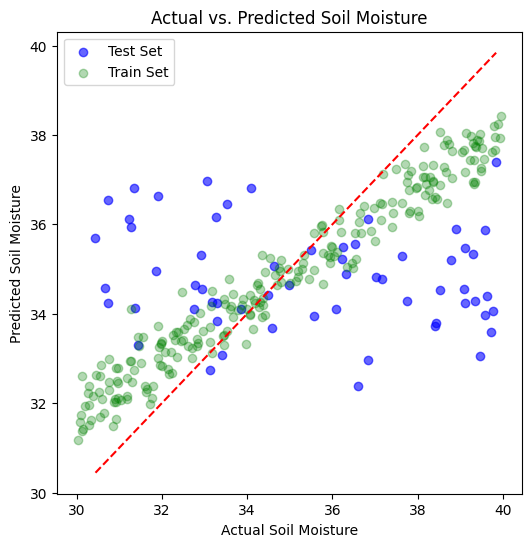

In [105]:

# 5. Visualization: Actual vs. Predicted Soil Moisture for the Best Model
best_model = models["Random Forest"]  # Choose based on lowest error
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred_test, alpha=0.6, label="Test Set", color='blue')
plt.scatter(y_train, y_pred_train, alpha=0.3, label="Train Set", color='green')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel("Actual Soil Moisture")
plt.ylabel("Predicted Soil Moisture")
plt.title("Actual vs. Predicted Soil Moisture")
plt.legend()
plt.show()

### Saving best model - Random Forest Regressor 

In [106]:
import joblib

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_reg, y_reg)

# Save the trained model to a file
joblib.dump(model, "soil_moisture_rf_model.pkl")

y_pred = model.predict(X_reg)
    
mae = mean_absolute_error(y_reg, y_pred)
rmse = np.sqrt(mean_squared_error(y_reg, y_pred))
    
    
print(f" - MAE: {mae:.4f}")
print(f" - RMSE: {rmse:.4f}")
# Print y_pred and y_reg for comparison


 - MAE: 1.0312
 - RMSE: 1.2071


In [107]:
comparison_df = pd.DataFrame({'Actual': y_reg, 'Predicted': y_pred})
print(comparison_df)


                               Actual  Predicted
Timestamp                                       
2024-10-06 04:54:53.407995  31.606611  32.990783
2024-10-08 10:54:53.407995  37.396984  36.536174
2024-10-08 16:54:53.407995  37.745170  36.998029
2024-10-08 22:54:53.407995  32.701840  33.227177
2024-10-09 04:54:53.407995  39.446354  37.641511
...                               ...        ...
2024-10-29 16:54:53.493508  39.232233  37.563258
2024-10-29 22:54:53.493508  33.576121  34.859113
2024-10-30 04:54:53.493508  33.178691  33.410271
2024-10-31 22:54:53.493508  31.285269  32.741369
2024-11-01 22:54:53.493508  30.971675  32.180017

[299 rows x 2 columns]


In [108]:
max_abs_diff = (comparison_df['Actual'] - comparison_df['Predicted']).abs().max()
print(f"Maximum Absolute Difference: {max_abs_diff:.4f}")

Maximum Absolute Difference: 2.8256


#### Thus we notice that our trained model gives optimal soil moisture predictions very close to the actual with max deviation of 2.8